In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('data_full_5sekres.xlsx')

In [3]:
df1 = df.copy()

In [9]:
'''
df1['SOC'] = 0

kwh = [0]*120960
kwh[0] = 496

bat = df1['battery_0__actualPower'].values
bat = bat/3600 #kWh of energy delivered one second

for i in range(len(kwh)):
    if i == 0:
        pass
    if i > 0 and i <= 604799:
        kwh[i] = kwh[i-1] - (bat[i])
        
pprosent = [0]*120960

for x in range (len(pprosent)):
    pprosent[x] = kwh[x]*100/620

df1['SoC'] = pprosent
display(df1)
'''

In [87]:
#Create a column of load profile
df1['Load'] = df1['thrusterAndPropulsion']
df1['BaseLoad'] = 300
df1['Load'] = df1['thrusterAndPropulsion'] + df1['BaseLoad']

df1['Battery'] = 0
df1['SOC'] = 0
#Create dataset with only relevant columns
df2 = df1[['datetime', 'Load', 'engMdoPower_0_','engMdoPower_1_','engMdoPower_2_', 'engMdoPower_3_', 'operationId', 'BaseLoad', 'Battery', 'SOC']]

#Set engine powers to zero
num = df2['engMdoPower_0_']._get_numeric_data()
num[num != 0] = 0

num = df2['engMdoPower_1_']._get_numeric_data()
num[num != 0] = 0

num = df2['engMdoPower_2_']._get_numeric_data()
num[num != 0] = 0

num = df2['engMdoPower_3_']._get_numeric_data()
num[num != 0] = 0


display(df2)

,datetime,Load,engMdoPower_0_,engMdoPower_1_,engMdoPower_2_,engMdoPower_3_,operationId,BaseLoad,Battery,SOC
0,2020-01-30 00:00:00,300.0,0.0,0.0,0,0.0,6.0,300,0,0
1,2020-01-30 00:00:05,300.0,0.0,0.0,0,0.0,6.0,300,0,0
2,2020-01-30 00:00:10,300.0,0.0,0.0,0,0.0,6.0,300,0,0
3,2020-01-30 00:00:15,300.0,0.0,0.0,0,0.0,6.0,300,0,0
4,2020-01-30 00:00:20,300.0,0.0,0.0,0,0.0,6.0,300,0,0
...,...,...,...,...,...,...,...,...,...,...
120955,2020-02-05 23:59:35,1796.0,0.0,0.0,0,0.0,3.0,300,0,0
120956,2020-02-05 23:59:40,1743.2,0.0,0.0,0,0.0,3.0,300,0,0
120957,2020-02-05 23:59:45,1725.6,0.0,0.0,0,0.0,3.0,300,0,0
120958,2020-02-05 23:59:50,1760.8,0.0,0.0,0,0.0,3.0,300,0,0


In [88]:
load = df2['Load'].values
dg0 = df2['engMdoPower_0_'].values
dg1 = df2['engMdoPower_1_'].values
dg2 = df2['engMdoPower_2_'].values
dg3 = df2['engMdoPower_3_'].values
bat = df2['Battery'].values
soc = df2['SOC'].values
soc[0] = 496 #124 empty
opid = df2['operationId'].values

for i in range(len(load)):
    if i == 120959:
        pass
    elif load[i] <= 1680:
        if soc[i] > 124 and opid[i] == 3:
            bat[i] = 200
            soc[i+1] = soc[i] - (bat[i]/720)
            dg0[i] = load[i]-bat[i]
        else:
            dg0[i] = load[i]
            soc[i+1] = soc[i]
    elif load[i] > 1680 and load[i] <= 3360:
        if soc[i] > 124  and opid[i] == 3:
            bat[i] = 200
            soc[i+1] = soc[i] - bat[i]/720
            dg0[i] = dg1[i] = (load[i]-bat[i])/2
        else:
            dg0[i] = dg1[i] = load[i]/2
            soc[i+1] = soc[i]
    elif load[i] > 3360:
        if soc[i] > 124 and opid[i] == 3:
            bat[i] = 200
            soc[i+1] = soc[i] - bat[i]/720
            dg0[i] = dg1[i] = dg2[i] = (load[i]-bat[i])/3
        else:
            dg0[i] = dg1[i] = dg2[i] = load[i]/3
            soc[i+1] = soc[i]


        
       

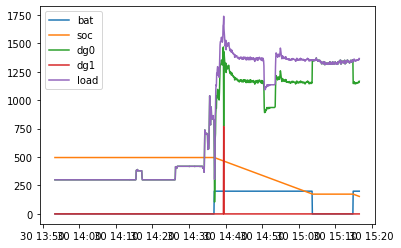

In [89]:
x = df2.iloc[10000:11000]['datetime']

plt.plot(x, bat[10000:11000], label = 'bat')
plt.plot(x, soc[10000:11000], label = 'soc')
plt.plot(x, dg0[10000:11000], label = 'dg0')
plt.plot(x, dg1[10000:11000], label = 'dg1')
plt.plot(x, load[10000:11000], label = 'load')
plt.legend()

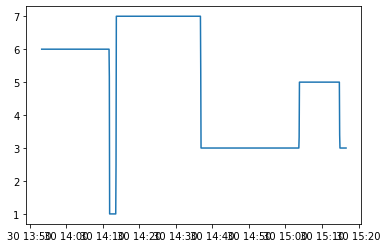

In [83]:
plt.plot(x, opid[10000:11000])